In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [4]:
# 初始化模型参数
def init_params():   
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

In [5]:
# 定义L2范数惩罚
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

def l1_penalty(w):
    return torch.sum(torch.abs(w)) # 弹幕说效果很好

In [8]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(
        xlabel='epochs',  
        ylabel='loss', 
        yscale='log',
        xlim=[5, num_epochs],
        legend=['train', 'test']
    )
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with torch.enable_grad():
                l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(
                epoch + 1, 
                (
                    d2l.evaluate_loss(net, train_iter, loss),
                    d2l.evaluate_loss(net, test_iter, loss)
                )
            )
    print('w的L2范数是：', torch.norm(w).item())

w的L2范数是： 13.996715545654297


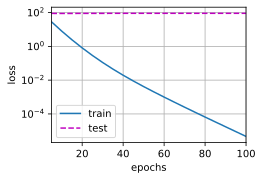

In [9]:
train(lambd=0)

w的L2范数是： 0.34100764989852905


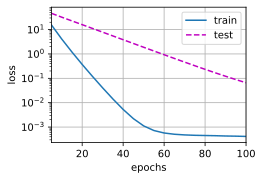

In [10]:
train(lambd=3)


w的L2范数是： 0.015589531511068344


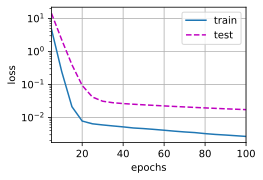

In [11]:
train(lambd=15)
